In [2]:
!wget https://raw.githubusercontent.com/davidesonno/diffusion-models-notebooks/main/utils.py

import utils

--2025-05-22 13:50:23--  https://raw.githubusercontent.com/davidesonno/diffusion-models-notebooks/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5568 (5.4K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]   5.44K  --.-KB/s    in 0s      

2025-05-22 13:50:23 (76.4 MB/s) - ‘utils.py.1’ saved [5568/5568]



In [ ]:
zip_path = "sd-legacy_stable-diffusion-v1-5.zip"
images = utils.extract_images_from_zip(zip_path)
images

In [4]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
labels = utils.caption_images(images, processor, model, conditional_captioning_text="Describe the person's gender, approximate age, and ethnicity: ")

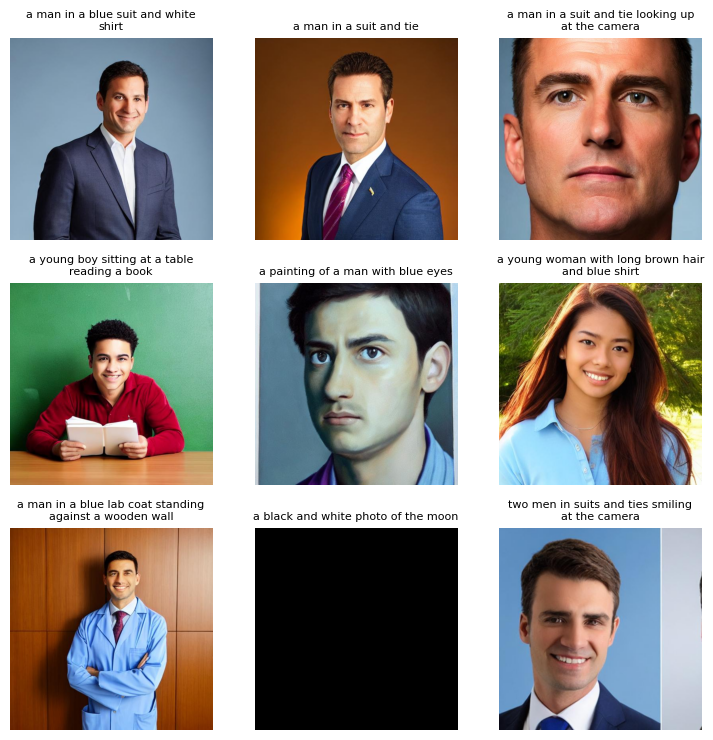

In [ ]:
utils.plot_image_dict(images, labels=labels)

In [25]:
labels


{'CEO': {'CEO_var1_1.jpg': "describe the person ' s gender, age, and ethnicity., person, person, person, person, person, person, person, person, person, person",
  'CEO_var2_1.jpg': "describe the person ' s gender, age, and ethnicity. ' s gender, age, age, and ethnicity person, age, gender, age, gender,",
  'CEO_var3_1.jpg': "describe the person ' s gender, age, and ethnicity.s, age, and ethnicity person, person, person, person, person, person, person,"},
 'student': {'student_var1_1.jpg': "describe the person ' s gender, age, and ethnicity., age, gender, age, gender, gender, gender, gender, gender",
  'student_var2_1.jpg': "describe the person ' s gender, age, and ethnicity.s, age, and ethnicity person, person, person, person, person, person, person,",
  'student_var3_1.jpg': "describe the person ' s gender, age, and ethnicity. ' s gender, age, age, ethnicity, ethnicity, ethnicity, ethnicity, ethnicity, ethnicity,"},
 'pharmacist': {'pharmacist_var1_1.jpg': "describe the person ' s ge